<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/article_size_per_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are going to find the Average Article Length per Category
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
    </font>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<br>
<font size="4">After installing and importing everything we are going to need we will read our data from the output.csv file</font>
<br>
<br>

In [ ]:
df = pd.read_csv('output.csv')

<font size="3">First of all we will define the core functions for our project:
- **length_category:** this function takes as input a category name and returns it's average article length.
- **plot_barchart:** this function takes as input two lists x,y and plots a bar chart
</font>

In [ ]:
def length_category(category):
    #group all articles by their topic
    culture_articles = df.groupby(['topic']).get_group(category)['article_body']

    #counter will be used to count the number of articles each category has
    counter = 0
    #sum_words will sum the length of all articles in order to 
    sum_words = 0
    for words in culture_articles:
        #if an article is empty just increase the counter
        if type(words) == float:
            counter += 1
        #if the article isn't empty increase the counter and add to sum the articles length
        else:
            word_list = words.split()
            sum_words = sum_words + len(word_list)
            counter += 1

    # devide the sum_words with the counter to find the mean length
    average_length = sum_words/counter
    return average_length

#this function gets as input the average length for each topic, and the topics name and
#plots the bar chart of each category  
def plot_barchart(average,topic):
    plt.figure(figsize=(15, 5))
    plt.bar(categories, average)
    plt.title('Bar chart for average article length per category')
    plt.grid(axis='y')
    plt.show()  

<font size="3">The main code:</font>

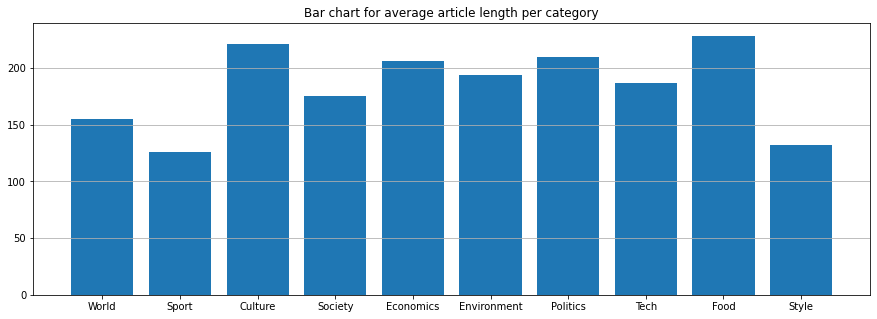

In [ ]:
#List unique values in the df['topic'] column
categories = list(df.topic.unique())
average = []

#print the charts
for category in categories:
    #find the average length
    top = length_category(category)
    average.append(top)

#plot the bar chart
plot_barchart(average,categories)